In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

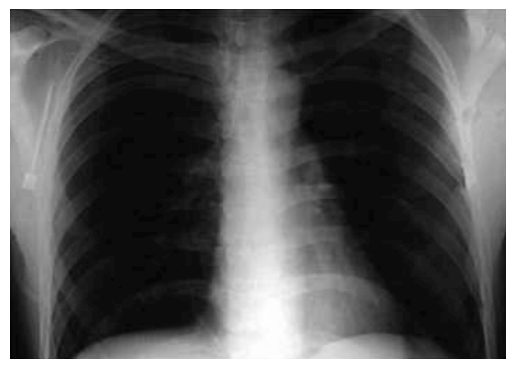

In [24]:
image = cv2.imread('mr.png', cv2.IMREAD_GRAYSCALE)

# show
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

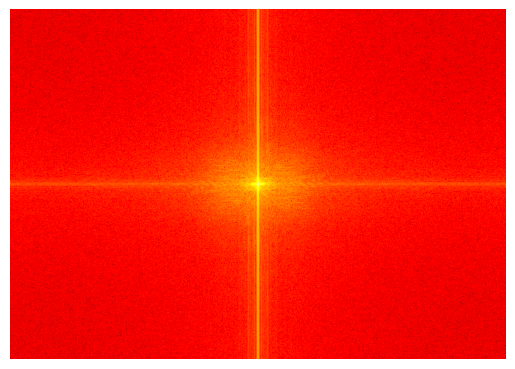

In [25]:
# fourier transform of image
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# show
plt.imshow(magnitude_spectrum, cmap='hot')
plt.axis('off')
plt.show()

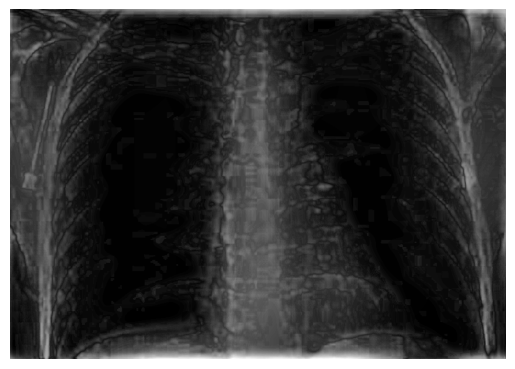

In [30]:
alpha = 0.15 
cutoff_frequency = 10  

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
x, y = np.meshgrid(x, y)
radius = np.sqrt(x**2 + y**2)
gaussian_filter = 1 - np.exp(-(radius**2) / (2 * (cutoff_frequency**2)))
f_shift_filtered = fshift * gaussian_filter
f_ishift = np.fft.ifftshift(f_shift_filtered)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)
filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

# enhance
enhanced_image = cv2.addWeighted(image, alpha, filtered_image, 1 - alpha, 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_image = clahe.apply(enhanced_image)

# show
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')
plt.show()

